In [1]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.8.0-CAPI-1.13.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
import geocoder

def get_coords(loc):
    g = geocoder.bing(loc, key='Ag-hhlLXX66GFF0QB3A84aPX16lgpoz-nGdT28B6IfGf_skCcDZ8XqG6qefUQ2-1')
    lat, lon = g.json['lat'], g.json['lng']

    return lat, lon

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

## Importing Shapefile

In [6]:
path = '/Users/reneprincipe/Library/CloudStorage/GoogleDrive-rlprincipe@up.edu.ph/My Drive/Research - MS/Codes/MS Thesis/MS-Thesis/Shape_Files/PhilGIS/'
# path = '/content/drive/MyDrive/Research - PhD/shapefiles/PhilGIS/'
sf_gpd_country = gpd.read_file(path + "Country (extract.me)/Country.shp")
sf_gpd_regions = gpd.read_file(path + "Regions (extract.me)/Regions.shp")
sf_gpd_municities = gpd.read_file(path + "MuniCities/MuniCities.shp")
sf_gpd_provinces = gpd.read_file(path + "Provinces/Provinces.shp")
sf_gpd_roads = gpd.read_file(path + "Roads/roads.shp")

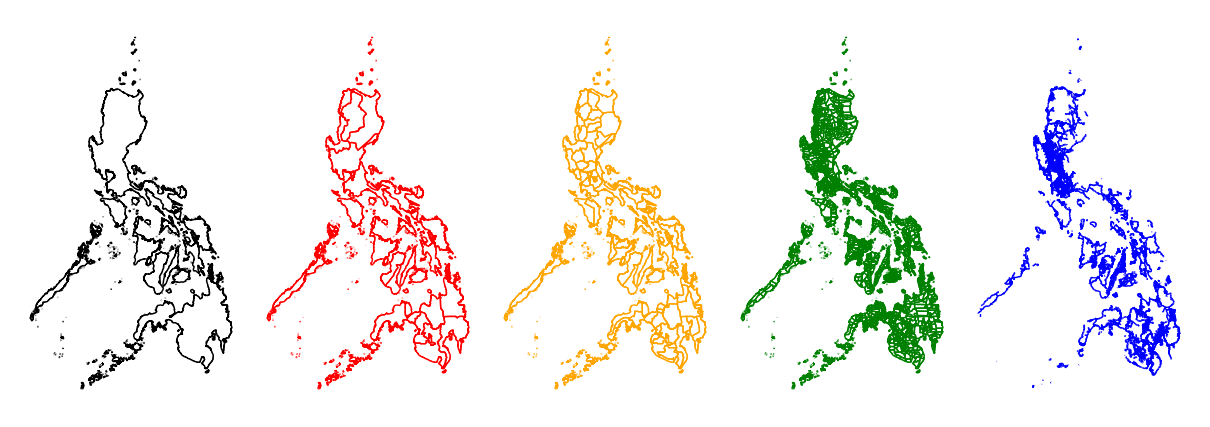

In [7]:
plt.figure(dpi = 200)
plt.subplot(151)
sf_gpd_country.plot(edgecolor="black", linewidth = 0.5, facecolor="None", ax = plt.gca())
plt.axis("off")
plt.subplot(152)
sf_gpd_regions.plot(edgecolor="red", linewidth = 0.5, facecolor="None", ax = plt.gca())
plt.rc('font', size = 5)
plt.axis("off")
plt.subplot(153)
sf_gpd_provinces.plot(edgecolor="orange", linewidth = 0.5, facecolor="None", ax = plt.gca())
plt.rc('font', size = 5)
plt.axis("off")
plt.subplot(154)
sf_gpd_municities.plot(edgecolor="green", linewidth = 0.5, facecolor="None", ax = plt.gca())
plt.rc('font', size = 5)
plt.axis("off")
plt.subplot(155)
sf_gpd_roads.plot(edgecolor="blue", linewidth = 0.5, facecolor="None", ax = plt.gca())
plt.rc('font', size = 5)
plt.axis("off")
plt.tight_layout()

## Importing VNP46A2 (Black Marble)

In [ ]:
# vnp46a2_loc = '/content/drive/MyDrive/Research - PhD/notebooks/datasets/'
vnp46a2_loc = '/content/drive/My Drive/Research - MS/Codes/MS Thesis/MS-Thesis/Earth Engine/VIIRS-Earth-Engine/'

bm_img = []
for i in range(1, 5):
    npy = np.load(vnp46a2_loc+'2022-05-01_' + str(i) + '.npy')
    bm_img.append(npy)

In [ ]:
# h29v07 = np.load('./VNP46A2/h29v07/2022-01-01.npy')
# h30v07 = np.load('./VNP46A2/h30v07/2022-01-01.npy')
# h29v08 = np.load('./VNP46A2/h29v08/2022-01-01.npy')
# h30v08 = np.load('./VNP46A2/h30v08/2022-01-01.npy')

In [ ]:
h29 = np.vstack((bm_img[0],bm_img[1]))
h30 = np.vstack((bm_img[2],bm_img[3]))
PH = np.hstack((h29,h30))

## Loading Resettlement Database

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
#defining my worksheet
# worksheet = gc.open('List of Housing Projects').sheet1
worksheet = gc.open('Philippine Resettlement Sites Database - RPrincipe et al. (2023)').sheet1
rows = worksheet.get_all_values()

#Convert to a DataFrame
df = pd.DataFrame(rows)
#creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]
#convert 'strings' to 'float'
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Buffer'] = pd.to_numeric(df['Buffer'], errors='coerce')

df

,Calamity,Project Name,Location,Classification,Latitude,Longitude,Buffer,Title,Map URL,Remarks,External Links,External Links,Typhoon,Province,Group
1,Typhoon Yolanda (2013),Maya Park Homes,"Brgy. Maya, Daanbantayan, Cebu",Identified,11.271009,124.048967,230.0,Maya Park,https://goo.gl/maps/3L3eRoigGDpjMxHT8,,,https://newsinfo.inquirer.net/944060/poor-nha-...,Yolanda,Cebu,Cebu
2,Typhoon Yolanda (2013),Lanao Unity Park Homes,"Brgy. Lanao, Daanbantayan, Cebu",Identified,11.248469,124.022224,280.0,Lanao Unity Park,https://goo.gl/maps/5SZCHBveYJqorcZ87,,https://daanbantayan.gov.ph/2022/04/04/lanao-u...,,Yolanda,Cebu,Cebu
3,Typhoon Yolanda (2013),Green Heights 1 (Daanbantayan 3),"Brgy. Tominjao, Daanbantayan, Cebu",Probable,11.221464,124.036788,260.0,Daanbantayan 3,https://goo.gl/maps/gjzeHfJ73dMTdiuX8,,,,Yolanda,Cebu,Cebu
4,Typhoon Yolanda (2013),Green Heights 2 (Daanbantayan 4),"Brgy. Tominjao, Daanbantayan, Cebu",Identified,11.173075,124.015380,160.0,Daanbantayan 4,https://goo.gl/maps/1PfPDyVLY4bHvp78A,Adress was wrong on the NHA list. Turn-over da...,https://www.facebook.com/photo/?fbid=165837642...,,Yolanda,Cebu,Cebu
5,Typhoon Yolanda (2013),Kandaya Homes 1 (Daanbantayan Site 1),"Brgy. Tapilon, Daanbantayan Site 1, Cebu",Identified,11.260164,124.036611,160.0,Daanbantayan Site 1,https://goo.gl/maps/2esB7Pmhx5NuNjYYA,Sites were raffled off to beneficiaries. Shape...,https://www.facebook.com/DaanbantayanLGU/photo...,https://www.facebook.com/DaanbantayanLGU/photo...,Yolanda,Cebu,Cebu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Probable,93,19.29,,NaN,NaN,NaN,,,,,,,,
489,Not Found,115,23.86,,NaN,NaN,NaN,,,,,,,,
490,Merged Sites,103,21.37,,NaN,NaN,NaN,,,,,,,,
491,,,,,NaN,NaN,NaN,,,,,,,,


In [ ]:
data = df[df['Buffer'].notna()].reset_index()
data

,index,Calamity,Project Name,Location,Classification,Latitude,Longitude,Buffer,Title,Map URL,Remarks,External Links,External Links,Typhoon,Province,Group
0,1,Typhoon Yolanda (2013),Maya Park Homes,"Brgy. Maya, Daanbantayan, Cebu",Identified,11.271009,124.048967,230.0,Maya Park,https://goo.gl/maps/3L3eRoigGDpjMxHT8,,,https://newsinfo.inquirer.net/944060/poor-nha-...,Yolanda,Cebu,Cebu
1,2,Typhoon Yolanda (2013),Lanao Unity Park Homes,"Brgy. Lanao, Daanbantayan, Cebu",Identified,11.248469,124.022224,280.0,Lanao Unity Park,https://goo.gl/maps/5SZCHBveYJqorcZ87,,https://daanbantayan.gov.ph/2022/04/04/lanao-u...,,Yolanda,Cebu,Cebu
2,3,Typhoon Yolanda (2013),Green Heights 1 (Daanbantayan 3),"Brgy. Tominjao, Daanbantayan, Cebu",Probable,11.221464,124.036788,260.0,Daanbantayan 3,https://goo.gl/maps/gjzeHfJ73dMTdiuX8,,,,Yolanda,Cebu,Cebu
3,4,Typhoon Yolanda (2013),Green Heights 2 (Daanbantayan 4),"Brgy. Tominjao, Daanbantayan, Cebu",Identified,11.173075,124.015380,160.0,Daanbantayan 4,https://goo.gl/maps/1PfPDyVLY4bHvp78A,Adress was wrong on the NHA list. Turn-over da...,https://www.facebook.com/photo/?fbid=165837642...,,Yolanda,Cebu,Cebu
4,5,Typhoon Yolanda (2013),Kandaya Homes 1 (Daanbantayan Site 1),"Brgy. Tapilon, Daanbantayan Site 1, Cebu",Identified,11.260164,124.036611,160.0,Daanbantayan Site 1,https://goo.gl/maps/2esB7Pmhx5NuNjYYA,Sites were raffled off to beneficiaries. Shape...,https://www.facebook.com/DaanbantayanLGU/photo...,https://www.facebook.com/DaanbantayanLGU/photo...,Yolanda,Cebu,Cebu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,444,Typhoon Pepeng (2009),Tuba Resettlement Proj.,"Tuba, Benguet",Probable,14.604640,121.260761,450.0,Tuba Res,Google Maps Link,,,,Pepeng,Benguet,Luzon
263,462,Typhoon Yolanda (2013),Brgy. Baldat (28 units),"Culion, Palawan",Probable,11.891470,119.987950,60.0,Badat,Apple Maps Link,,,,Yolanda,Palawan,Luzon
264,463,Typhoon Yolanda (2013),Brgy. Binudac (406 units),"Culion, Palawan",Probable,11.820858,119.907452,100.0,Binudac,,Probable Says it mentions 406 units but the un...,,,Yolanda,Palawan,Luzon
265,464,Typhoon Yolanda (2013),"Brgy. Galoc (274 units), Culion, Palawan","Culion, Palawan",Probable,11.922839,119.879509,250.0,Galoc,,Still in the process; Buffer size also not sur...,,,Yolanda,Palawan,Luzon


In [ ]:
# data = pd.read_csv('Resettlement_Coords.txt', delimiter = "\t").dropna()
# data

# Plotting Philippine NTL

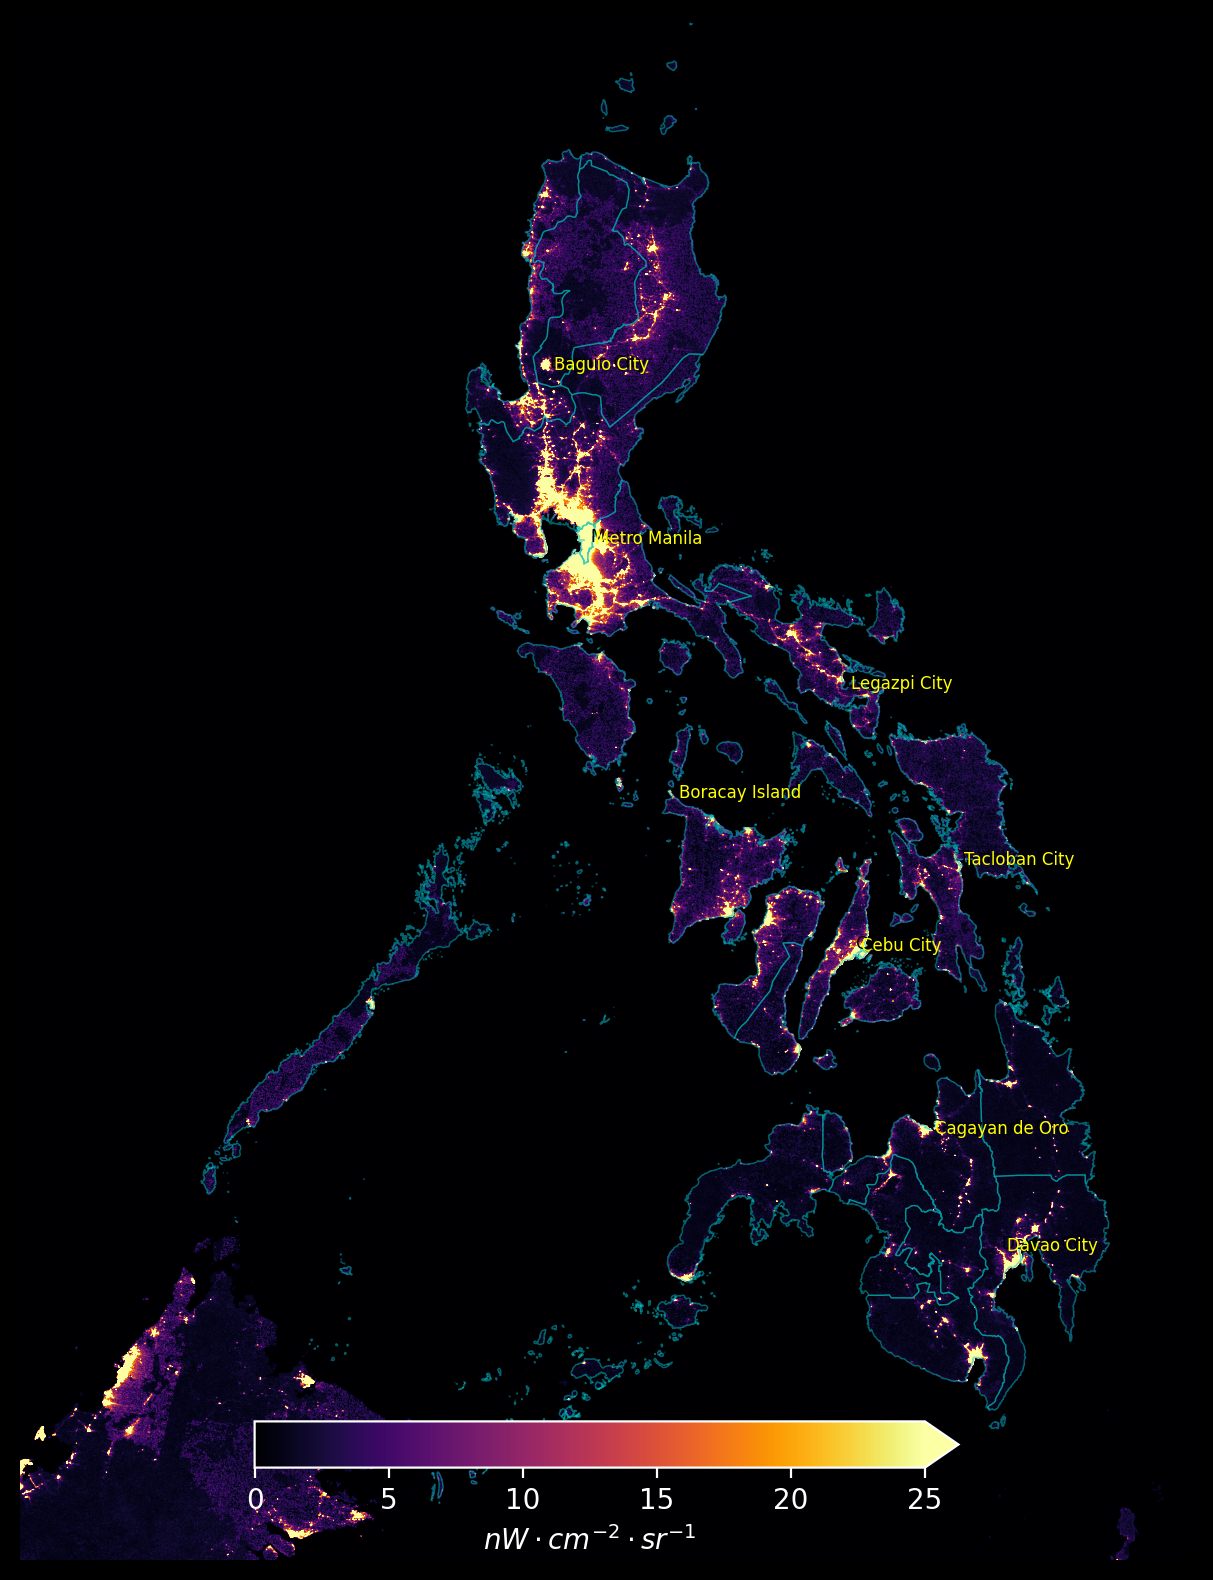

In [ ]:
extent = (110,130,0,20)
plt.rcParams.update({'font.size': 10})

fig = plt.figure(figsize = (10,10), dpi = 200, facecolor = 'k')

#NIGHTTIME LIGHTS
img = plt.imshow(PH, 'inferno', vmax = 25, extent = extent)

#ADMIN BOUNDARIES
# sf_gpd_country.plot(edgecolor="b", linewidth = 0.6, alpha = 1, facecolor="None", ax = plt.gca())
#sf_gpd_provinces.plot(edgecolor="m", linewidth = 0.5, alpha = 1, facecolor="None", ax = plt.gca())
sf_gpd_regions.plot(edgecolor="c", linewidth = 0.5, alpha = 0.5, facecolor="None", ax = plt.gca())


for loc in ['Tacloban City', 'Metro Manila', 'Cebu City', 'Legazpi City',
            'Cagayan de Oro', 'Davao City', 'Boracay Island', 'Baguio City']:

    lat, lon = get_coords(loc)
    # plt.plot(lon-0.001, lat-0.001, 'k.')
    # plt.plot(lon, lat, 'm.')
    plt.annotate(loc, xy = (lon+0.05,lat-0.03), color = 'k', fontsize = 6.1)
    plt.annotate(loc, xy = (lon+0.10,lat-0.05), color = 'yellow', fontsize = 6)

divider = make_axes_locatable(plt.gca())
cb = fig.colorbar(img, cax = plt.gca().inset_axes((0.2, 0.06, 0.6, 0.03)),
             orientation = 'horizontal', extend='max')
fg_color = 'white'
cb.ax.yaxis.set_tick_params(color=fg_color)
cb.outline.set_edgecolor(fg_color)
cb.set_label('$nW \cdot cm^{-2} \cdot sr^{-1}$', color=fg_color)
plt.xlim(115, 127.5)
plt.ylim(4, 20)

plt.axis('off')
plt.minorticks_on()
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
plt.rcParams.update({"xtick.color" : "white"})
# plt.tight_layout()
plt.show()

## Plotting Philippine Resettlement Sites

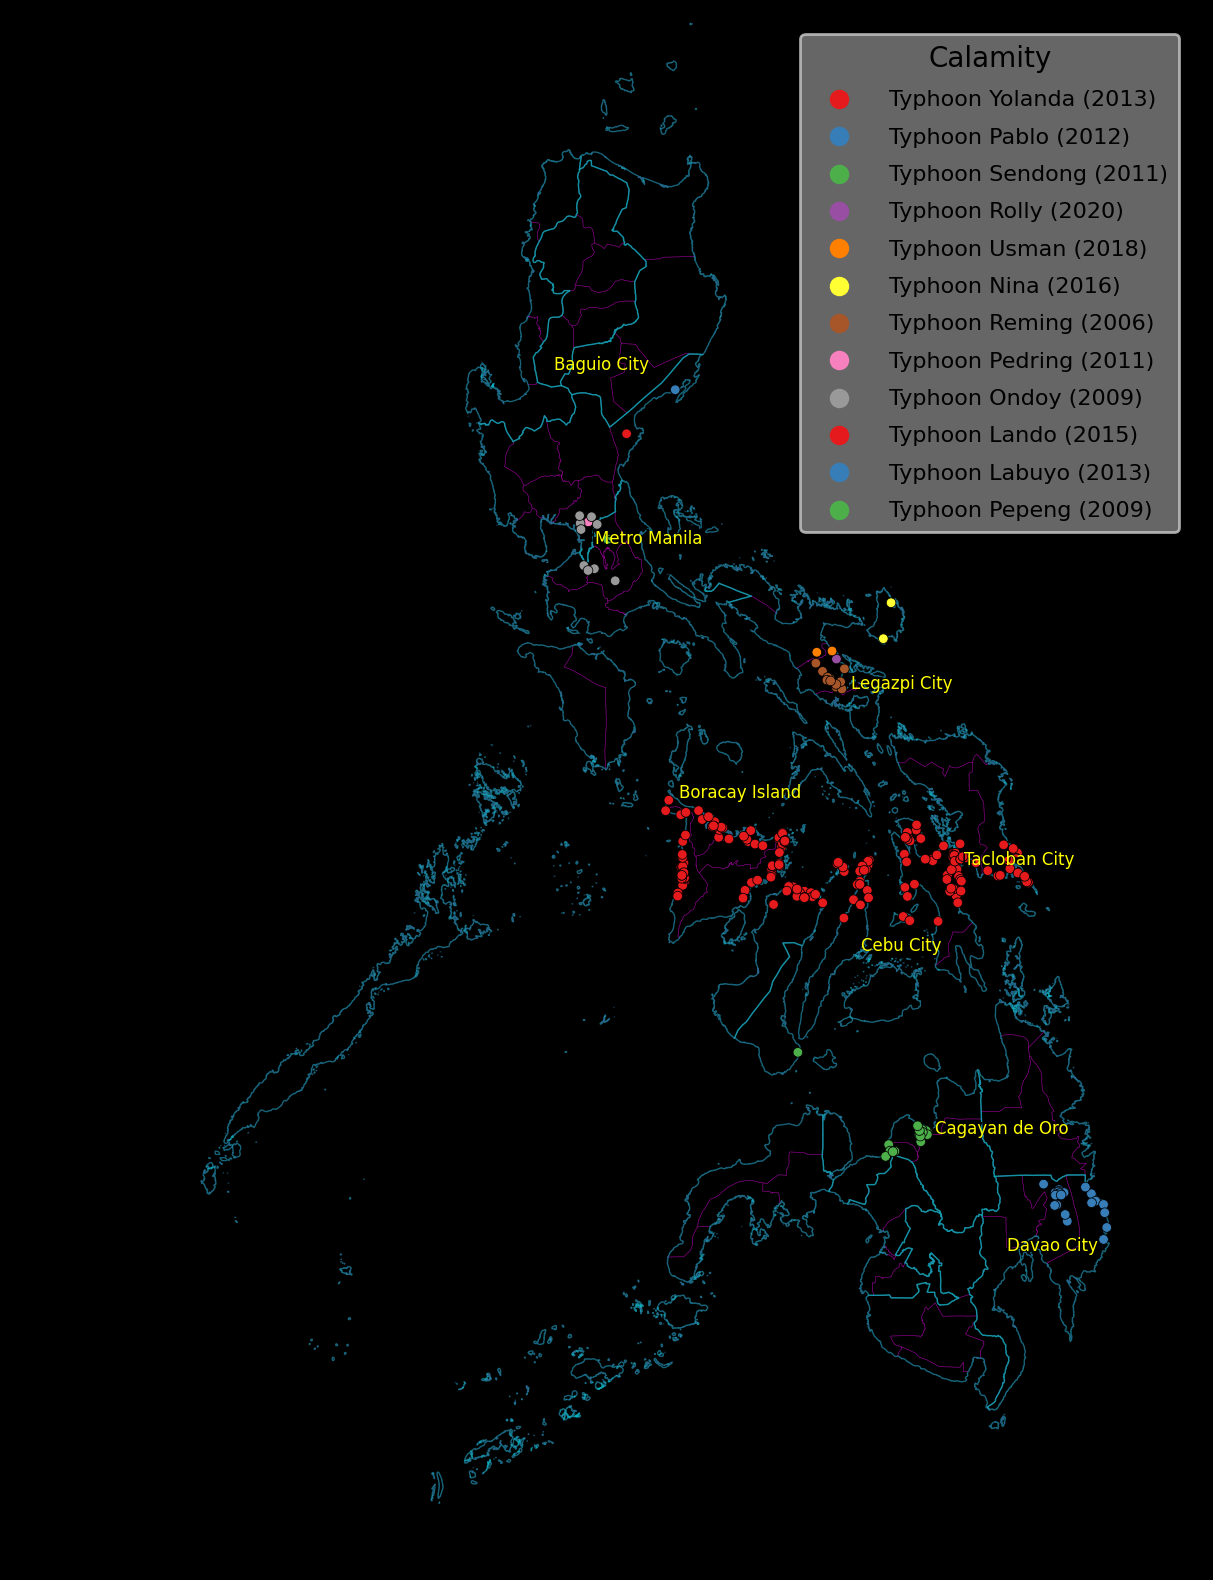

In [ ]:
extent = (110,130,0,20)
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.facecolor']='gray'

fig = plt.figure(figsize = (10,10), dpi = 200, facecolor = 'k')

#ADMIN BOUNDARIES
# sf_gpd_country.plot(edgecolor="b", linewidth = 0.6, alpha = 1, facecolor="None", ax = plt.gca())
sf_gpd_provinces.plot(edgecolor="m", linewidth = 0.2, alpha = 0.5, facecolor="None", ax = plt.gca())
sf_gpd_regions.plot(edgecolor="c", linewidth = 0.5, alpha = 0.5, facecolor="None", ax = plt.gca())

for loc in ['Tacloban City', 'Metro Manila', 'Cebu City', 'Legazpi City',
            'Cagayan de Oro', 'Davao City', 'Boracay Island', 'Baguio City']:

    lat, lon = get_coords(loc)
    # plt.plot(lon-0.001, lat-0.001, 'k.')
    # plt.plot(lon, lat, 'm.')
    plt.annotate(loc, xy = (lon+0.05,lat-0.03), color = 'k', fontsize = 6.1)
    plt.annotate(loc, xy = (lon+0.10,lat-0.05), color = 'yellow', fontsize = 6)

#palette = sns.color_palette("bright_d",n_colors=12)
#palette.reverse()

ax = sns.scatterplot(data = data, x = 'Longitude', y = 'Latitude', hue = 'Calamity',
                palette="Set1", edgecolor='k', s = 12)

plt.axis('off')
plt.minorticks_on()
plt.setp(ax.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='10') # for legend title
plt.rcParams.update({"xtick.color" : "white"})
plt.xlim(115, 127.5)
plt.ylim(4, 20)
# plt.tight_layout()
plt.show()

## Database Statistics

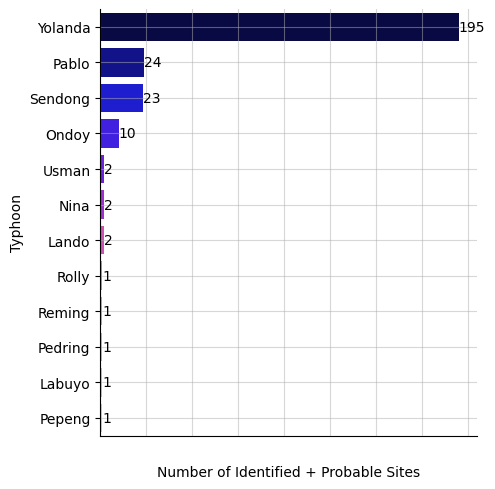

In [ ]:
# plt.figure(figsize = (15,3), dpi = 150)
y = data
plt.rcParams['axes.facecolor']='white'
g = sns.catplot(y = 'Typhoon', data = data, kind='count',
                palette = 'gnuplot2', order = data['Typhoon'].value_counts().index)
plt.grid(alpha = 0.5)

ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_width()):1.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xlabel('Number of Identified + Probable Sites')
plt.show()

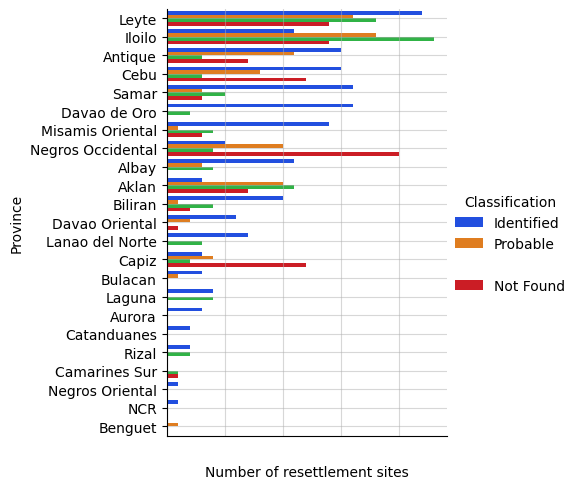

In [ ]:
g = sns.catplot(y = 'Province', data = df, kind='count', hue = 'Classification',
                palette = 'bright', order = data['Province'].value_counts().index)
plt.grid(alpha = 0.5)

ax = g.facet_axis(0, 0)

#for c in ax.containers:
#    labels = [f'{(v.get_width()):1.0f}' for v in c]
#    ax.bar_label(c, labels=labels, label_type='edge')
plt.xlabel('Number of resettlement sites')
plt.show()

###

In [ ]:
classification = df[:468].groupby(['Province', 'Classification']).size().reset_index().pivot(columns='Classification', index='Province', values=0)
classification

Classification,,Identified,Not Found,Probable
Province,,,,
Aklan,11.0,3.0,7.0,10.0
Albay,4.0,11.0,NaN,3.0
Antique,3.0,15.0,7.0,11.0
Aurora,NaN,3.0,NaN,NaN
Benguet,NaN,NaN,NaN,1.0
Biliran,4.0,10.0,2.0,1.0
Bulacan,NaN,3.0,NaN,1.0
Camarines Sur,NaN,1.0,1.0,NaN
Capiz,2.0,3.0,12.0,4.0


In [ ]:
classification.rename(columns={classification.columns[0]: "Merged/Duplicates" }, inplace = True)#.reset_index(inplace=True)
classification.reset_index(inplace=True)
classification = classification.set_index(['Province'])
classification

Classification,Merged/Duplicates,Identified,Not Found,Probable
Province,,,,
Aklan,11.0,3.0,7.0,10.0
Albay,4.0,11.0,NaN,3.0
Antique,3.0,15.0,7.0,11.0
Aurora,NaN,3.0,NaN,NaN
Benguet,NaN,NaN,NaN,1.0
Biliran,4.0,10.0,2.0,1.0
Bulacan,NaN,3.0,NaN,1.0
Camarines Sur,NaN,1.0,1.0,NaN
Capiz,2.0,3.0,12.0,4.0


In [ ]:
#classification['Total'] = classification.sum(axis=1)
df_class = classification
df_class.fillna(0, inplace=True)
df_class['Total'] = df_class[['Identified', 'Probable']].sum(axis=1)
df_class

Classification,Merged/Duplicates,Identified,Not Found,Probable,Total
Province,,,,,
Aklan,11.0,3.0,7.0,10.0,13.0
Albay,4.0,11.0,0.0,3.0,14.0
Antique,3.0,15.0,7.0,11.0,26.0
Aurora,0.0,3.0,0.0,0.0,3.0
Benguet,0.0,0.0,0.0,1.0,1.0
Biliran,4.0,10.0,2.0,1.0,11.0
Bulacan,0.0,3.0,0.0,1.0,4.0
Camarines Sur,0.0,1.0,1.0,0.0,1.0
Capiz,2.0,3.0,12.0,4.0,7.0


In [ ]:
df_class_sorted = df_class.sort_values(by='Total', ascending=True)
df_class_sorted

Classification,Merged/Duplicates,Identified,Not Found,Probable,Total
Province,,,,,
Isabela,0.0,0.0,12.0,0.0,0.0
Masbate,1.0,0.0,0.0,0.0,0.0
Ilocos Norte,0.0,0.0,1.0,0.0,0.0
Negros Oriental,0.0,1.0,0.0,0.0,1.0
Benguet,0.0,0.0,0.0,1.0,1.0
Camarines Sur,0.0,1.0,1.0,0.0,1.0
NCR,0.0,1.0,0.0,0.0,1.0
Compostella Valley,1.0,1.0,0.0,0.0,1.0
Catanduanes,0.0,2.0,0.0,0.0,2.0


In [ ]:
path = '/content/drive/MyDrive/Research - PhD/Results/Resettlements/'

FileNotFoundError: ignored

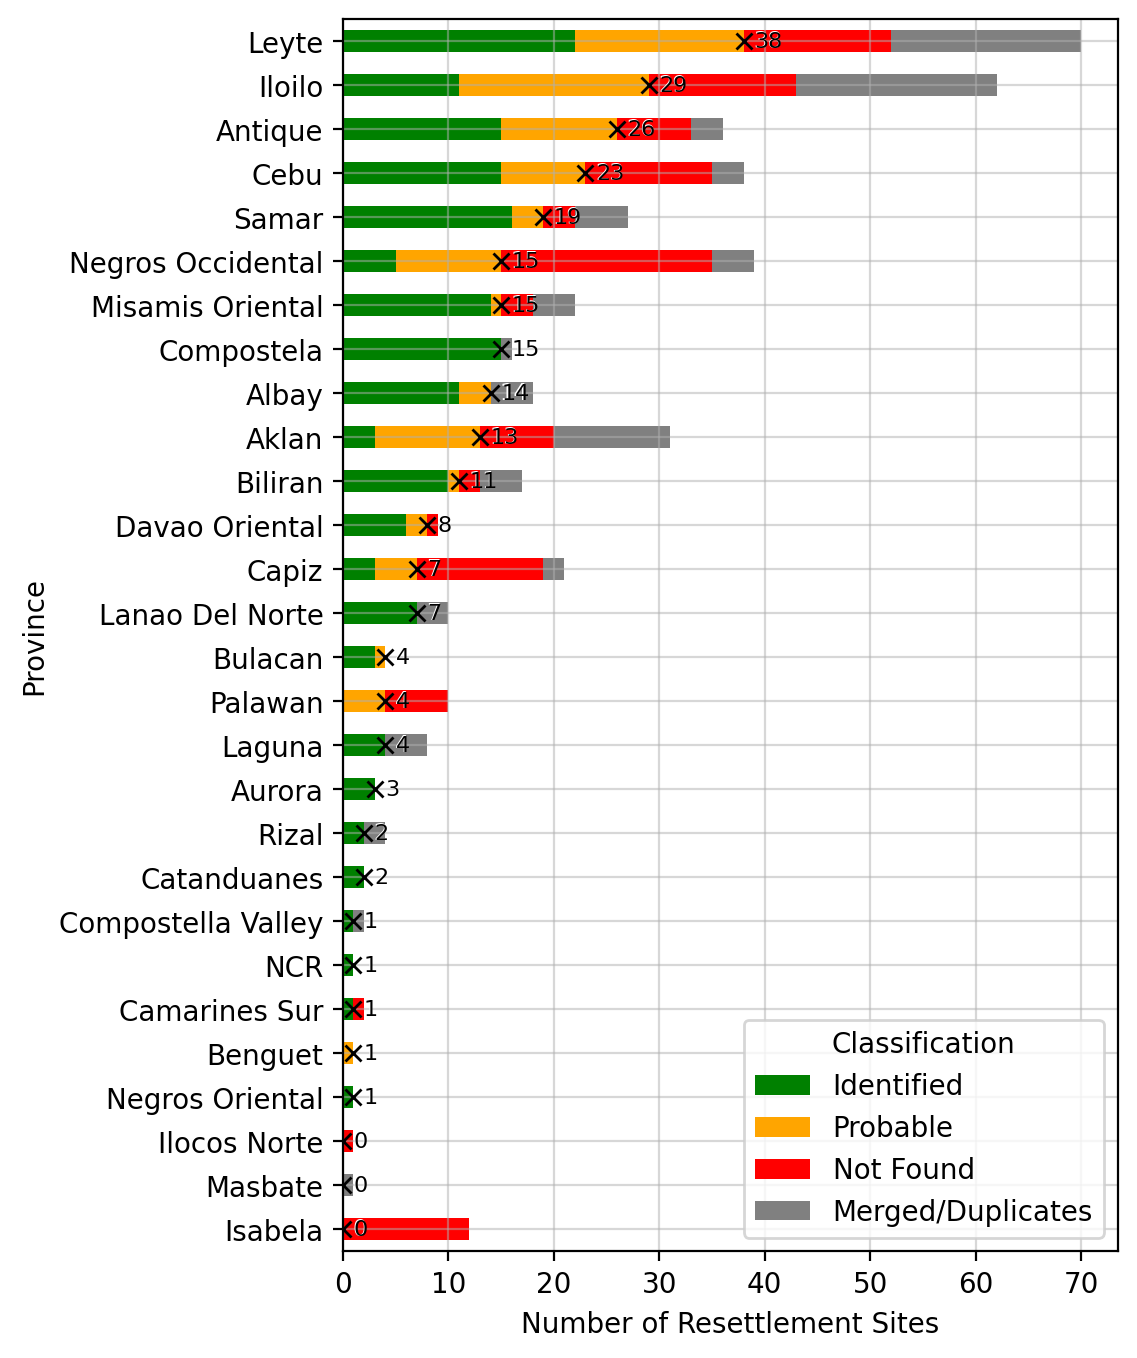

In [ ]:
fig, ax = plt.subplots(figsize = (5,8), dpi = 200)
ax = df_class_sorted.drop(columns=['Total']).plot(kind='barh', stacked=True,
                                              y=['Identified', 'Probable', 'Not Found', 'Merged/Duplicates'],
                                              color=['green', 'orange', 'red', 'gray'],
                                              ax = ax)


for index, value in enumerate(df_class_sorted['Total']):
    ax.text(value+0.9, index, str(int(value)), ha='left', va='center', fontsize=8.2, color = 'w')
    ax.text(value+1, index, str(int(value)), ha='left', va='center', fontsize=8)

#ax.plot(df_class_sorted['Total'], df_class_sorted.index, color='black', linewidth=2)
ax.grid(alpha = 0.5)
ax.plot(df_class_sorted['Total'], df_class_sorted.index, 'kx')
plt.xlabel('Number of Resettlement Sites')
plt.savefig(path + "Provinces vs Site.png", bbox_inches="tight")
plt.show()

In [ ]:
storm = df[:468].groupby(['Typhoon', 'Classification']).size().reset_index().pivot(columns='Classification', index='Typhoon', values=0)
storm

Classification,,Identified,Not Found,Probable
Typhoon,,,,
"Juan, Pedring, Qiuel",NaN,NaN,12.0,NaN
Labuyo,NaN,1.0,NaN,NaN
Lando,NaN,2.0,NaN,NaN
Nina,NaN,2.0,NaN,NaN
Ondoy,6.0,10.0,NaN,NaN
Pablo,2.0,22.0,1.0,2.0
Pedring,NaN,NaN,NaN,1.0
Pepeng,NaN,NaN,1.0,1.0
Reming,NaN,1.0,NaN,NaN


In [ ]:
storm.rename(columns={storm.columns[0]: "Merged/Duplicates" }, inplace = True)#.reset_index(inplace=True)
storm.reset_index(inplace=True)
storm = storm.set_index(['Typhoon'])

df_storm = storm
df_storm.fillna(0, inplace=True)
df_storm['Total'] = df_storm[['Identified', 'Probable']].sum(axis=1)

df_storm_sorted = df_storm.sort_values(by='Total', ascending=True)
df_storm_sorted

Classification,Merged/Duplicates,Identified,Not Found,Probable,Total
Typhoon,,,,,
"Juan, Pedring, Qiuel",0.0,0.0,12.0,0.0,0.0
Labuyo,0.0,1.0,0.0,0.0,1.0
Pedring,0.0,0.0,0.0,1.0,1.0
Pepeng,0.0,0.0,1.0,1.0,1.0
Reming,0.0,1.0,0.0,0.0,1.0
Rolly,1.0,1.0,0.0,0.0,1.0
Lando,0.0,2.0,0.0,0.0,2.0
Nina,0.0,2.0,0.0,0.0,2.0
Usman,0.0,2.0,1.0,0.0,2.0


<function matplotlib.pyplot.show(close=None, block=None)>

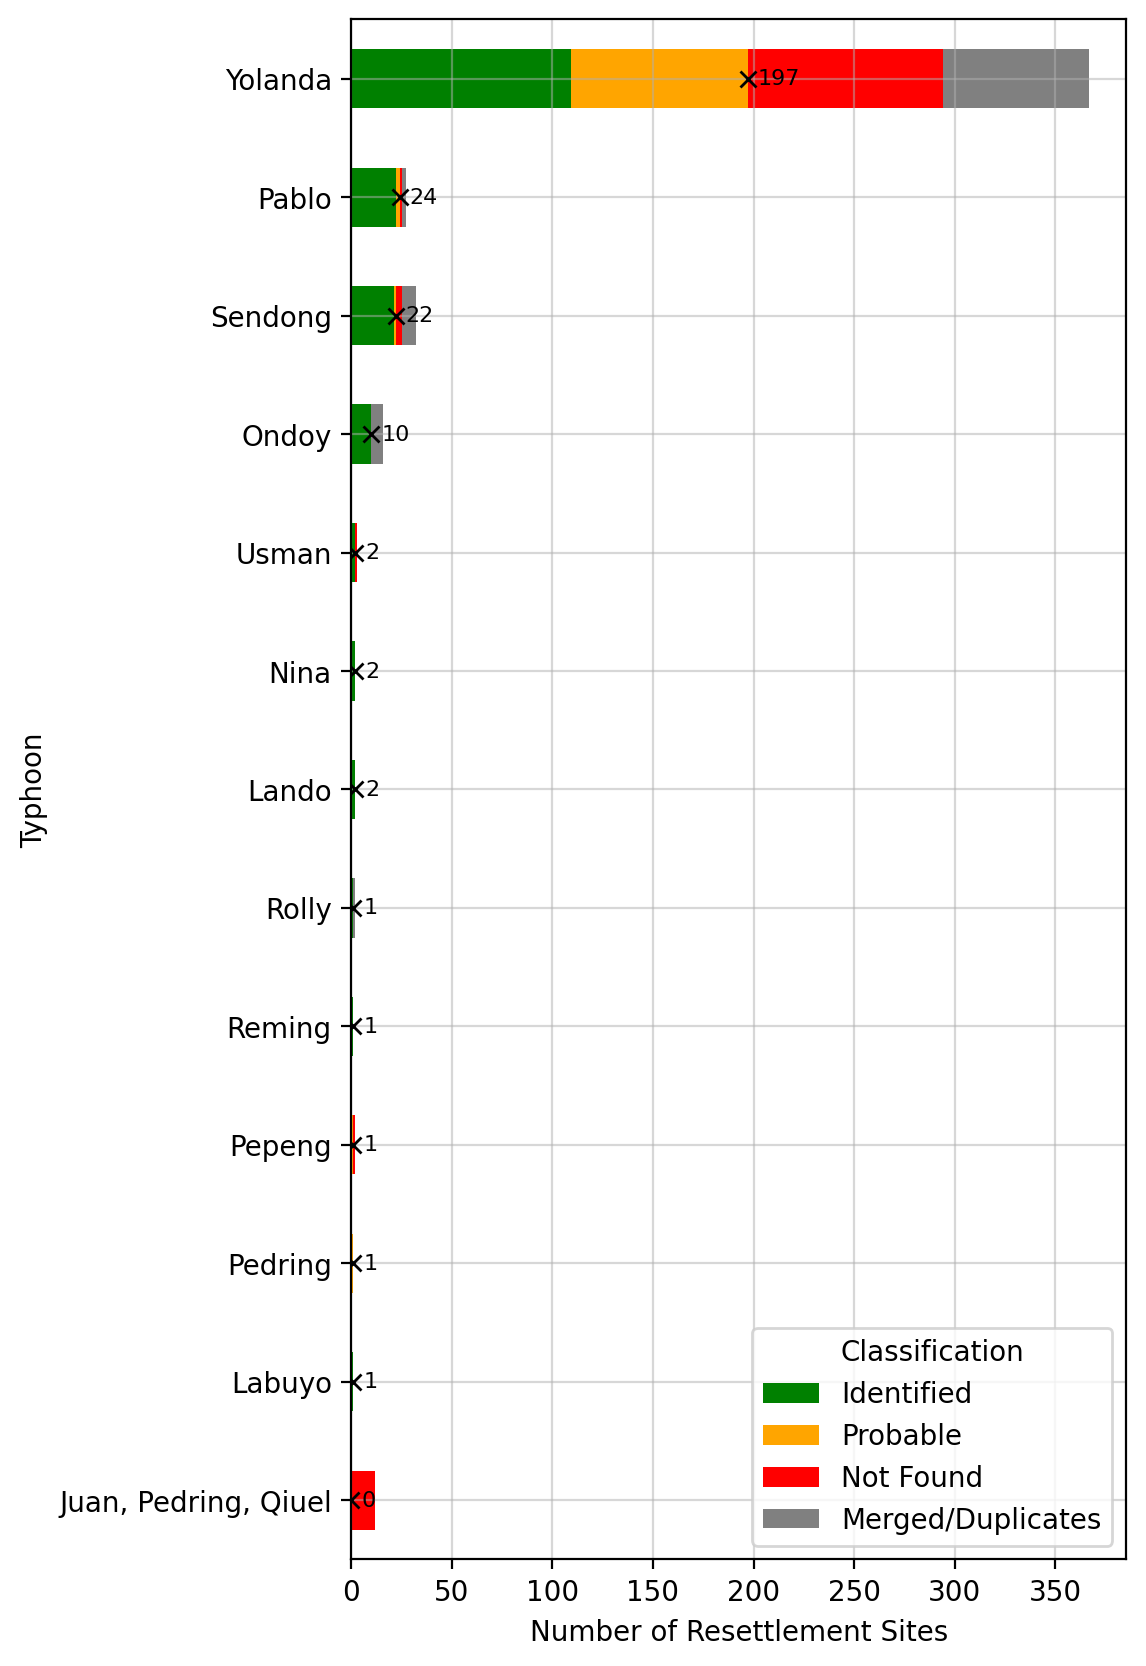

In [48]:
fig, ax = plt.subplots(figsize = (5,10), dpi = 200)
ax = df_storm_sorted.drop(columns=['Total']).plot(kind='barh', stacked=True,
                                              y=['Identified', 'Probable', 'Not Found', 'Merged/Duplicates'],
                                              color=['green', 'orange', 'red', 'gray'],
                                              ax = ax)

#ax.plot(df_class_sorted['Total'], df_class_sorted.index, color='black', linewidth=2)
ax.grid(alpha = 0.5)
ax.plot(df_storm_sorted['Total'], df_storm_sorted.index, 'kx')

for index, value in enumerate(df_storm_sorted['Total']):
    ax.text(value+ 5, index, str(int(value)), ha='left', va='center', fontsize=8)

plt.xlabel('Number of Resettlement Sites')
plt.savefig(path + "Typhoon vs Site.png", bbox_inches="tight")
plt.show